In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [46]:
#Setting the default style for plots
plt.style.use('ggplot')

from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (12,8)

%matplotlib inline

In [47]:
movie_dates_df = pd.read_csv('movie_release_dates.csv', index_col=0)
theaters_df = pd.read_csv('movie_theater_data.csv', index_col=0)
awards_df = pd.read_csv('movie_awards.csv', index_col=0)
actors_df = pd.read_csv('Actors_Table.csv')
directors_df = pd.read_csv('Directors_Table.csv')
imdb_base_df = pd.read_csv('IMDb_base.csv')
imdb_budgets_df = pd.read_csv('IMDb_budgets.csv')
studio_df = pd.read_csv('studiodf.csv')

In [48]:
#First remove any movies that had a $0 domestic gross.
imdb_budgets_df = imdb_budgets_df[imdb_budgets_df['Domestic Gross'] !=0]

In [49]:
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,8.40,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564
1,Avatar,2009,7.80,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337
2,Black Panther,2018,7.30,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376
3,Avengers: Infinity War,2018,8.40,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754
4,Titanic,1997,7.80,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395


In [50]:
movie_dates_df.head()

,movie,release_date,release_month,release_day,release_year
0,Metropolis,1927-03-06,March,Sunday,1927
1,"Dr. Mabuse, the Gambler",1927-08-08,August,Monday,1927
2,The Unknown,1927-06-03,June,Friday,1927
3,The Jazz Singer,1927-10-06,October,Thursday,1927
4,Chicago,1927-12-23,December,Friday,1927


In [51]:
theaters_df.head()

,title,max_theaters,year,total_dom_gross($),studio
0,The Lion King,4802,2019,543638043,Disney
1,Avengers: Endgame,4662,2019,858373000,Disney
2,Spider-Man: Far from Home,4634,2019,390532085,Sony
3,Toy Story 4,4575,2019,434038008,Disney
4,It Chapter Two,4570,2019,211593228,Warner Bros.


In [52]:
actors_df.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Robert Downey Jr.,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Chris Evans,"Apr 23, 2019",400000000,858373000,2797800564
2,Avengers: Endgame,2019,Mark Ruffalo,"Apr 23, 2019",400000000,858373000,2797800564
3,Avengers: Endgame,2019,Chris Hemsworth,"Apr 23, 2019",400000000,858373000,2797800564
4,Avatar,2009,Sam Worthington,"Dec 17, 2009",237000000,760507625,2788701337


In [53]:
directors_df.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Joe Russo,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Anthony Russo,"Apr 23, 2019",400000000,858373000,2797800564
2,Avatar,2009,James Cameron,"Dec 17, 2009",237000000,760507625,2788701337
3,Black Panther,2018,Ryan Coogler,"Feb 13, 2018",200000000,700059566,1346103376
4,Avengers: Infinity War,2018,Joe Russo,"Apr 25, 2018",300000000,678815482,2048359754


In [54]:
imdb_base_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre
0,Star Wars: Episode VII - The Force Awakens,2015,7.90,PG-13,138,"Action, Adventure, Sci-Fi"
1,Avengers: Endgame,2019,8.40,PG-13,181,"Action, Adventure, Drama"
2,Avatar,2009,7.80,PG-13,162,"Action, Adventure, Fantasy"
3,Black Panther,2018,7.30,PG-13,134,"Action, Adventure, Sci-Fi"
4,Avengers: Infinity War,2018,8.40,PG-13,149,"Action, Adventure, Sci-Fi"


In [55]:
studio_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,Buena Vista,415000000.00,652000000,2010
1,Alice in Wonderland (2010),Buena Vista,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,Pixar/Dreamworks,238700000.00,513900000,2010


### Question 1: What are the most profitable movies and how much should you spend?

Let's calculate profit and profit margin for each of the movies in imdb_budgets_df dataframe and add those as new columns.

Here, we'll define profit as Worldwide Gross-Production Budget.

It will also be beneficial in our analysis to have uniformity when discussing movie budgets and profits so we will also create an adjusted budget and adjusted profit column to account for inflation.

We will use an average inflation rate of 3.22%.

In [56]:
imdb_budgets_df['Profit'] = imdb_budgets_df['Worldwide Gross'] - imdb_budgets_df['Production Budget']

imdb_budgets_df['Profit_Margin'] = (imdb_budgets_df['Worldwide Gross'] - 
                                    imdb_budgets_df['Production Budget'])/imdb_budgets_df['Worldwide Gross']

In [57]:
imdb_budgets_df['Adjusted_Budget'] = ((((2020-imdb_budgets_df['Year'])*.0322)+1)*
                                      imdb_budgets_df['Production Budget'])

#Suppressing Scienific Notation
pd.options.display.float_format = '{:.2f}'.format

imdb_budgets_df['Adjusted_Profit'] = (((2020-imdb_budgets_df['Year'])*.0322)+1)*imdb_budgets_df['Profit']
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,Avengers: Endgame,2019,8.40,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.86,412880000.00,2475009742.16
1,Avatar,2009,7.80,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.92,320945400.00,3455513950.57
2,Black Panther,2018,7.30,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376,1146103376,0.85,212880000.00,1219912433.41
3,Avengers: Infinity War,2018,8.40,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.85,319320000.00,1860954122.16
4,Titanic,1997,7.80,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.91,348120000.00,3495487532.34


For this question we are specifically looking at profitable movies. We'll create a separate dataframe called profitable_movies_df where the Profit column is greater than 0. We will then sort by Adjusted_Profit to rank movies in terms of profitability.

In [58]:

profitable_movies_df = imdb_budgets_df.loc[imdb_budgets_df['Profit'] > 0]
profitable_ranked_df = profitable_movies_df.sort_values(by=['Adjusted_Profit'], ascending=False)
profitable_ranked_df.reset_index(inplace=True) #Modify the DataFrame in place (do not create a new object).
profitable_ranked_df.head()

,index,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,4,Titanic,1997,7.80,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.91,348120000.00,3495487532.34
1,1,Avatar,2009,7.80,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.92,320945400.00,3455513950.57
2,0,Avengers: Endgame,2019,8.40,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.86,412880000.00,2475009742.16
3,3,Avengers: Infinity War,2018,8.40,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.85,319320000.00,1860954122.16
4,28,Jurassic Park,1993,8.10,PG-13,127,"Action, Adventure, Sci-Fi","Jun 11, 1993",63000000,402523348,1045627627,982627627,0.94,117772200.00,1836924085.91


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


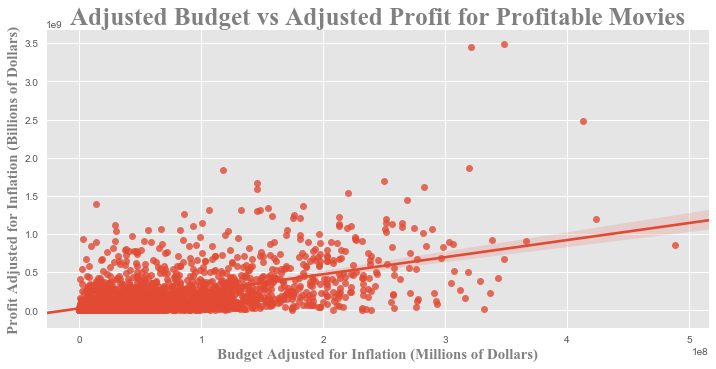

In [59]:
ax1 = sns.lmplot(x='Adjusted_Budget', y='Adjusted_Profit', data=profitable_ranked_df, aspect=2)
plt.xlabel('Budget Adjusted for Inflation (Millions of Dollars)', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
#setting x-axis label 
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Adjusted for Inflation (Billions of Dollars)',fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.title('Adjusted Budget vs Adjusted Profit for Profitable Movies', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '25'})
plt.savefig('BudgetVProfit', dpi = 300);

This scatter plot is helpful in beginning to understand how much money should be budgeted for a movie. The positive trend line indicates that an increase in the budget will result in an increase in profit.

Let's take a look at the most successful movies so that we can get a better idea of what the budget should be.

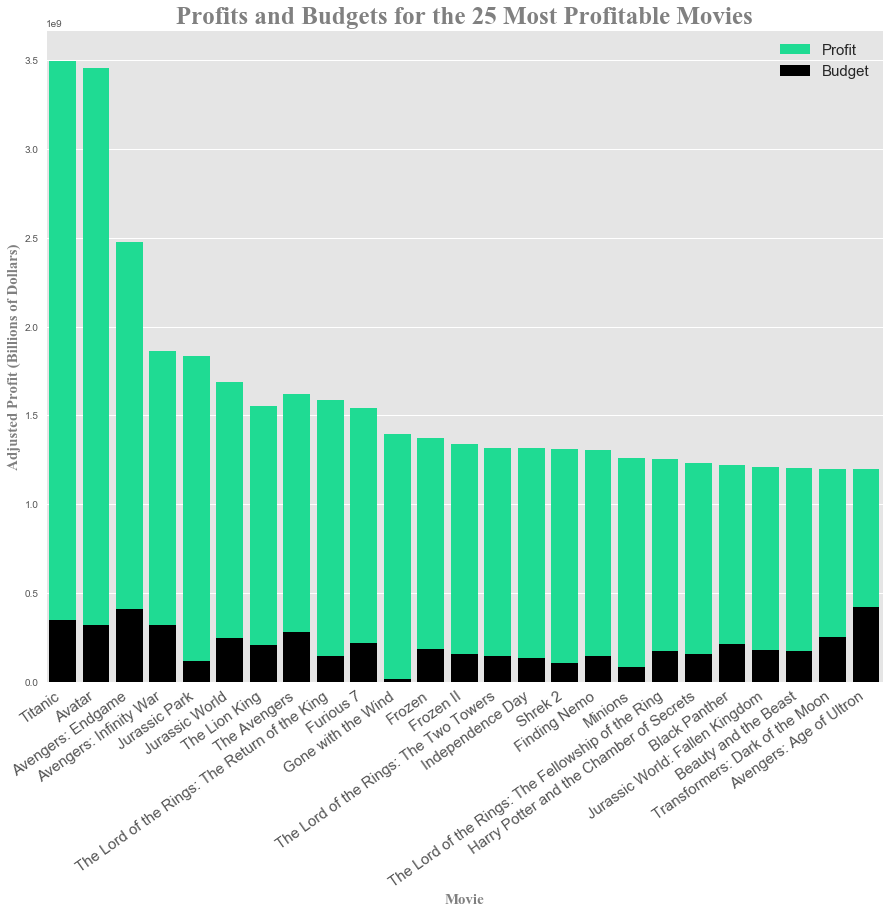

In [60]:
plt.figure(figsize=(15,12))
sns.barplot(x=profitable_ranked_df.loc[0:25, 'Movie'],y=profitable_ranked_df.loc[0:25, 'Adjusted_Profit'], 
            color='mediumspringgreen', label='Profit', ci=None)
sns.barplot(x=profitable_ranked_df.loc[0:25, 'Movie'],y=profitable_ranked_df.loc[0:25, 'Adjusted_Budget'], 
            color='black', label='Budget', ci=None)
plt.xlabel('Movie', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.title("Profits and Budgets for the 25 Most Profitable Movies", fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '25'})
plt.ylabel('Adjusted Profit (Billions of Dollars)', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.xticks(rotation=35, horizontalalignment='right', fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.savefig('ProfitBudgetTop25', dpi=300);

In [61]:
profitable_movies_df['Adjusted_Budget'].describe()

count        2836.00
mean     60689139.20
std      63199464.86
min         10606.40
25%      16608850.00
50%      38684100.00
75%      82247150.00
max     488834200.00
Name: Adjusted_Budget, dtype: float64

In [62]:
profitable_movies_df.loc[0:24, 'Adjusted_Budget'].describe()

count          25.00
mean    242777774.40
std      80698866.89
min     106064000.00
25%     180635000.00
50%     225760000.00
75%     282960000.00
max     423765000.00
Name: Adjusted_Budget, dtype: float64

In [63]:
profitable_movies_df['Profit_Margin'].describe()

count   2836.00
mean       0.62
std        0.24
min        0.00
25%        0.47
50%        0.67
75%        0.81
max        1.00
Name: Profit_Margin, dtype: float64

In [64]:
profitable_movies_df.loc[0:24, 'Profit_Margin'].describe()

count   25.00
mean     0.85
std      0.05
min      0.74
25%      0.81
50%      0.85
75%      0.87
max      0.93
Name: Profit_Margin, dtype: float64

In [65]:
len(profitable_ranked_df.loc[profitable_ranked_df['Profit_Margin'] > 0.5])

2041

Clearly the most successful 25 movies have both incredible profits and profit margins. Titanic (1997), Avatar, and Avengers: Endgame are the most successful movies in terms of sheer profit.

So how do we know what to spend? We need to think about what sort of profit margin we want to see. 2043 out of 2841 total profitable movies have a profit margin over 50%. That's good news as it indicates that we can be more aggressive in choosing a threshold for the profit margin. The top 25 movies have a median profit margin of 84.9% with a median budget of $225,760,000. When looking at all of our profitable movies, the profit margin drops significantly to 67.1% and the budget drops significantly to $38,676,000. We use the median to describe our data here as the mean will be skewed by outlier data.

Let's filter the data with a profit margin of 75% or greater and a budget greater than $38,676,000.

In [66]:
filtered_df = profitable_ranked_df.loc[(profitable_ranked_df['Profit_Margin'] >= 0.75) & 
                         (profitable_ranked_df['Adjusted_Budget'] > 38676000)]
len(filtered_df)

374

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


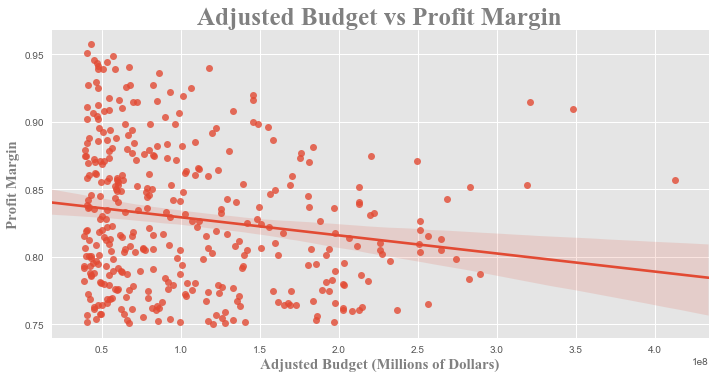

In [67]:
ax2 = sns.lmplot(x='Adjusted_Budget', y='Profit_Margin', data=filtered_df, aspect=2)
plt.xlabel('Adjusted Budget (Millions of Dollars)', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit Margin', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.title('Adjusted Budget vs Profit Margin', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '25'})
plt.savefig('BudgetVMargin', dpi=300);

In [68]:
filtered_df.describe()

,index,Year,IMDb,Runtime,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,391.53,2004.97,7.01,118.60,77814178.13,193378841.67,484994903.63,407180725.50,0.83,105858522.51,562879114.94
std,378.20,10.81,0.90,24.02,57570152.51,127088965.57,377690264.14,329994078.69,0.05,66272237.80,413114307.71
min,0.00,1956.00,3.30,79.00,13500000.00,19019882.00,69995385.00,54995385.00,0.75,38685000.00,123209844.42
25%,111.25,1998.00,6.40,100.00,35000000.00,106948347.75,217288435.75,176354400.25,0.78,53471100.00,274861614.08
50%,279.50,2007.00,7.00,116.00,55000000.00,162801999.50,350937609.00,299062980.00,0.82,82249300.00,449229900.01
75%,550.50,2014.00,7.70,131.75,100000000.00,242081446.50,636084264.50,513979301.75,0.87,139654600.00,719591073.46
max,2424.00,2020.00,9.00,228.00,400000000.00,858373000.00,2797800564.00,2551701337.00,0.96,412880000.00,3495487532.34


We examine the data in a scatter plot again to see if we can determine trends. Our data is much more spread out when comparing profit margin and budget. The trend line in this plot is negative which cautions against spending too much money as we may potentially hurt our profit margin. Looking at the filtered data, we have a median budget of $82,249,300 and a median profit margin of 81.9%.

**Question 1 Conclusion**: We recommend that our Company should budget approximately $82,250,000 to make a movie. This should correlate with a profit margin above 80%.

### Question 2: Which movie genres are most common and contribute to higher net profits?

In [69]:
#Create a genre table that separates each value in the genre column in their own rows.
imdb_budgets_df['Genre'] = imdb_budgets_df['Genre'].str.split(', ')
imdb_budgets_df1 = imdb_budgets_df['Genre'].apply(pd.Series)

imdb_budgets_df2 = pd.merge(imdb_budgets_df, imdb_budgets_df1, right_index = True, left_index = True)

imdb_budgets_df3 = imdb_budgets_df2.drop(['Genre'], axis = 1)

genre_budgets_df = imdb_budgets_df3.melt(id_vars=['Movie', 'Year'], value_vars=[0, 1, 2] ,var_name = ['X'])
genre_budgets_df = pd.merge(genre_budgets_df, imdb_budgets_df)
genre_budgets_df = genre_budgets_df.drop(['Genre', 'X'], axis=1)
genre_budgets_df = genre_budgets_df.drop_duplicates()
genre_budgets_df = genre_budgets_df.rename(columns={'value': 'Genre'})
genre_budgets_df = genre_budgets_df.dropna()

In [70]:
#Do a count of all movies grouped by genre.
m_by_genre = genre_budgets_df.groupby('Genre', as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)

In [71]:
m_by_genre

,Genre,Movie
6,Drama,1876
4,Comedy,1444
0,Action,1045
1,Adventure,834
5,Crime,689
15,Romance,622
18,Thriller,615
11,Horror,410
14,Mystery,356
16,Sci-Fi,330


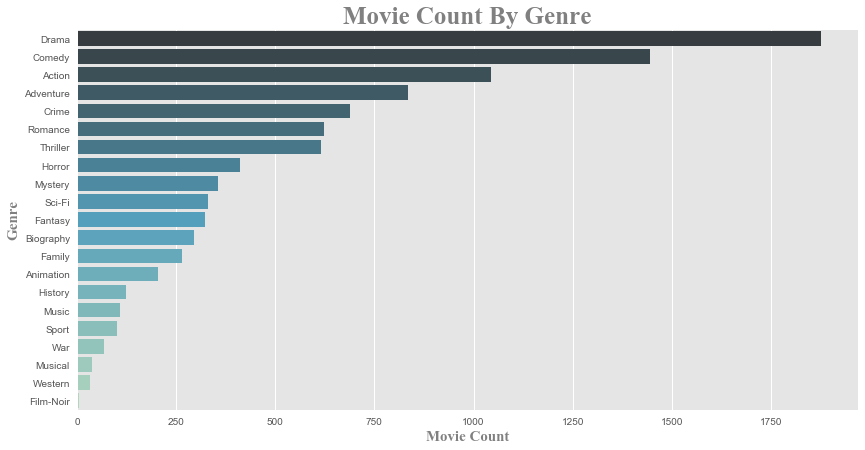

In [72]:
#Plot the above findings.
plt.figure(figsize=(14,7))
ax3 = sns.barplot(x=m_by_genre['Movie'], y=m_by_genre['Genre'], palette='GnBu_d')
plt.xlabel('Movie Count', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.ylabel('Genre', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.title('Movie Count By Genre', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '25'})
plt.savefig('CountGenre', dpi=300);

We can see that drama, comedy, and action dominate the quantity of movie genres but does this necessarily mean these are the most profitable genres? In order to determine this we will once again group each genre but this time we are going to take a look at the average net profit for each.

In [73]:
#Once again group the movies by genre, showing the average net profit and profit margin for each.
p_by_genre = genre_budgets_df.groupby('Genre', as_index=False)[['Adjusted_Profit', 'Profit_Margin']].median().sort_values(by='Adjusted_Profit', ascending=False)

In [74]:
p_by_genre

,Genre,Adjusted_Profit,Profit_Margin
2,Animation,203606574.36,0.68
1,Adventure,123795016.96,0.61
16,Sci-Fi,76199115.79,0.60
7,Family,74621544.29,0.58
0,Action,64332532.19,0.52
8,Fantasy,54057582.24,0.54
18,Thriller,47338952.53,0.60
13,Musical,46631897.60,0.65
14,Mystery,39634323.82,0.61
11,Horror,38963349.12,0.67


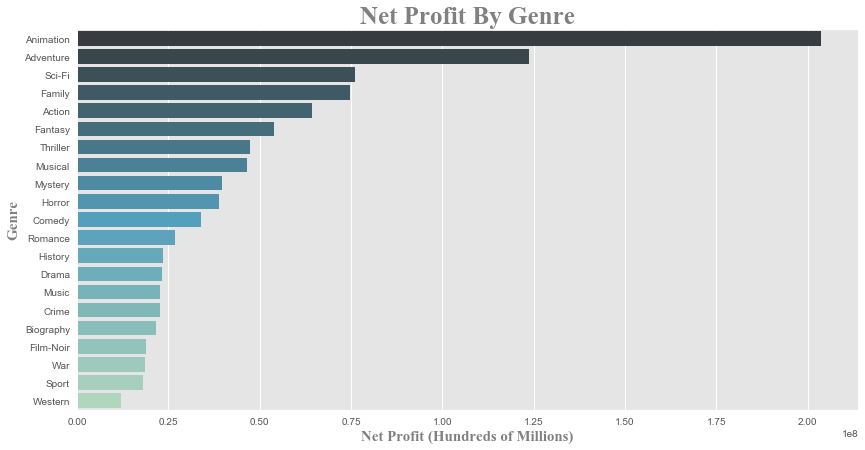

In [75]:
#Plot the above findings.
plt.figure(figsize=(14,7))
ax4 = sns.barplot(x=p_by_genre['Adjusted_Profit'], y=p_by_genre['Genre'], palette='GnBu_d')
plt.xlabel('Net Profit (Hundreds of Millions)', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.ylabel('Genre',fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.title('Net Profit By Genre', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '25'})
plt.savefig('NetProfitGenre', dpi=300);

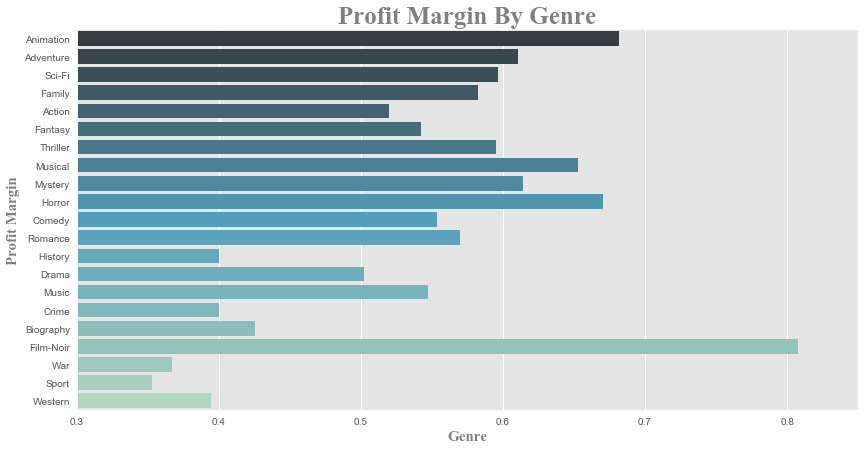

In [76]:

plt.figure(figsize=(14,7))
ax5 = sns.barplot(x=p_by_genre['Profit_Margin'], y=p_by_genre['Genre'], palette='GnBu_d')
plt.xlabel('Genre', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.ylabel('Profit Margin', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.title('Profit Margin By Genre', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '25'})
plt.xlim(0.3, 0.85)
plt.savefig('ProfitMarginGenre', dpi=300);

Interesting, although they are not the most commonly released genres; animation, adventure, and sci-fi typically have the most success in terms of median net profit. We can also see that Animation has a desirable profit margin along with horror and musicals. Note: although Film Noir leads with a .8+ profit margin this is based on 6 movies and has to be disregarded due to the small sample size.

Lastly, of what percentage of the total net profit from all genres does each genre account?

In [77]:
#Grouped by genre, find the percent total of the net profit for each.
per_by_genre = genre_budgets_df.groupby(['Genre'],  as_index=False)['Adjusted_Profit'].sum().sort_values(by='Adjusted_Profit', ascending=False)
per_by_genre['Percent Total of Net Profit'] = (per_by_genre['Adjusted_Profit']/per_by_genre['Adjusted_Profit'].sum()*100).round(2)
per_by_genre

,Genre,Adjusted_Profit,Percent Total of Net Profit
1,Adventure,217335741708.40,18.07
0,Action,178930045524.32,14.88
4,Comedy,151922895671.69,12.63
6,Drama,144990041873.71,12.05
16,Sci-Fi,70465612908.78,5.86
2,Animation,68720987812.40,5.71
18,Thriller,65442236225.98,5.44
8,Fantasy,54797139085.80,4.56
15,Romance,50510744180.92,4.20
7,Family,46040638020.14,3.83


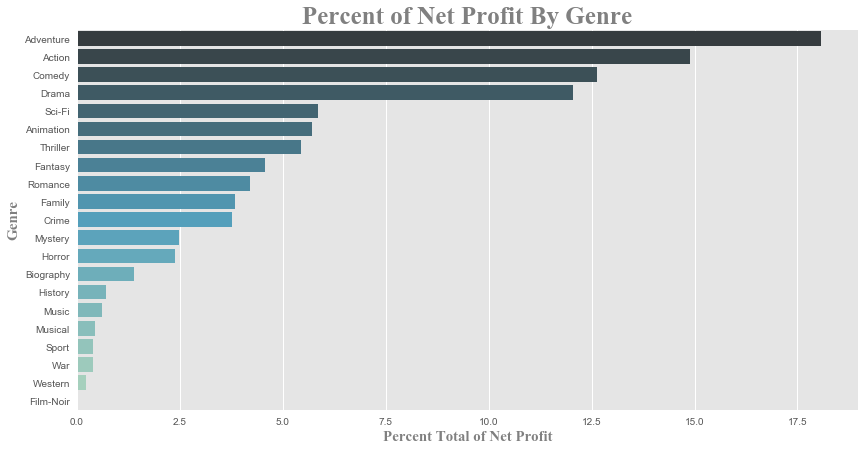

In [78]:

#Plot the above findings.
plt.figure(figsize=(14,7))
ax6 = sns.barplot(x=per_by_genre['Percent Total of Net Profit'], y=per_by_genre['Genre'], palette='GnBu_d')
plt.xlabel('Percent Total of Net Profit', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.ylabel('Genre', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '15'})
plt.title('Percent of Net Profit By Genre', fontdict = {'fontname': 'Times New Roman', 'color': 'gray', 'fontsize' : '25'})
plt.savefig('PercentProfitGenre');

Now we can see that adventure, action, comedy and drama make up the lionshare of the overall net profits from all movies. However, from our recent observations we know there are also major opportunities in the animation and sci-fi markets due to lower saturation but high average net profits. We will soon determine which genres are most successful during which months.

**Question 2 Conclusion**: We recommend that our Company should focus their efforts on the top 6 most profitable movie genres: Adventure, Action, Comedy, Drama, Sci-Fi and Animation. A further recommendation to focus on Sci-Fi and Animation due to less competition and a higher opportunity to profit.